## Bass Model Analysis for Electric Vehicles in Germany

In [106]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("fivethirtyeight")
from sklearn import linear_model
from math import sqrt
import seaborn as sns

In [107]:
evehicle = pd.read_csv("sales e vehicle.csv", index_col =[0], dayfirst=True)
evehicle.tail()

,sales,cumulative sales
year,,
31-12-2017,34022,109066
31-12-2018,53861,162927
31-12-2019,83175,246102
31-12-2020,136617,382719
31-12-2021,309083,691802


In [108]:
evehicle

,sales,cumulative sales
year,,
31-12-2008,1436,1436
31-12-2009,1452,2888
31-12-2010,1588,4476
31-12-2011,2307,6783
31-12-2012,4541,11324
31-12-2013,7114,18438
31-12-2014,12156,30594
31-12-2015,18948,49542
31-12-2016,25502,75044


Text(0, 0.5, 'Sales')

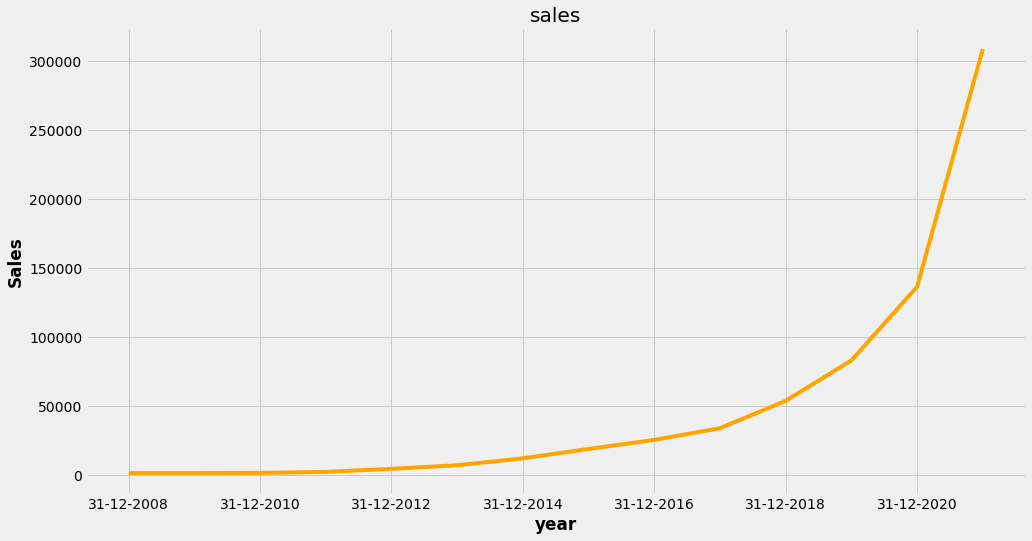

In [109]:
plt.figure(figsize = (15,8))
evehicle["sales"].plot(style="orange")

plt.title( "sales")
plt.xlabel("year",fontweight='bold')
plt.ylabel("Sales",fontweight='bold')



Text(0.5, 0, 'year')

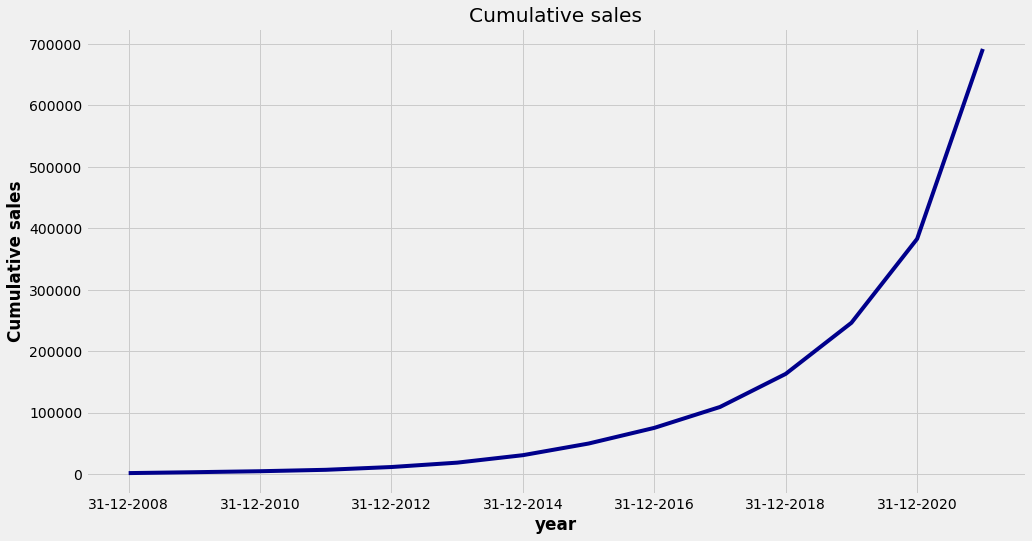

In [110]:
plt.figure(figsize = (15,8))
evehicle["cumulative sales"].plot(style="darkblue")

plt.title( "Cumulative sales")
plt.ylabel("Cumulative sales",fontweight='bold')
plt.xlabel("year",fontweight='bold')

In [111]:
linRegData = pd.DataFrame()
linRegData["sales"] = evehicle["sales"]
linRegData["N"] = evehicle["cumulative sales"]
linRegData["N**2"] = (evehicle["cumulative sales"]**2)

In [112]:
linRegData.head()


,sales,N,N**2
year,,,
31-12-2008,1436,1436,2062096
31-12-2009,1452,2888,8340544
31-12-2010,1588,4476,20034576
31-12-2011,2307,6783,46009089
31-12-2012,4541,11324,128232976


In [113]:
linearRegression = linear_model.LinearRegression()
linearRegression.fit(linRegData[["N", "N**2"]].values, linRegData["sales"].values)

LinearRegression()

In [114]:
linearRegression.intercept_,    linearRegression.coef_


(2209.342876189592, array([2.61996627e-01, 2.60447925e-07]))

m = (-beta1 +- sqr(beta1*2-4beta0beta2)/(2beta2)

p = beta0/m

q = beta1 + beta0/m

In [115]:
T = 80

b0 = linearRegression.intercept_
b1 =  linearRegression.coef_[0]
b2 =  linearRegression.coef_[1]
b0, b1, b2

(2209.342876189592, 0.2619966266465733, 2.604479248583395e-07)

In [116]:
#m = -((-b1-sqrt(b1**2-(4*b0*b2))) /( 2 * b2))
m=112751676
m

112751676

In [117]:
#p1 = b0/m
#p1
#q1 = b1 + (b0/m)

p2 =.0001
q2=.25
p3= .0002
p4=.00001
q3=.3
q4=.1
print ("p:", p2 ,"and q: ", q2)

p: 0.0001 and q:  0.25


In [118]:
predictionQt2 = [0,]
predictionN2 = [0,]

for i in range(0,T):
    N = predictionN2[i]
    adopters = (p2*m)+(q2-p2)*N + (-q2/m) * N**2
    adopters = (p2*m)+(q2-p2)*N+(-q2/m)*(N**2)
    adoptorenT = round(adopters, 2)
    predictionQt2.append(adopters)
    predictionN2.append((predictionN2[i]+adopters))


In [119]:
predictionQt3 = [0,]
predictionN3= [0,]

for i in range(0,T):
    N = predictionN3[i]
    adopters = (p2*m)+(q3-p2)*N + (-q3/m) * N**2
    adopters = (p2*m)+(q3-p2)*N+(-q3/m)*(N**2)
    adoptorenT = round(adopters, 2)
    predictionQt3.append(adopters)
    predictionN3.append((predictionN3[i]+adopters))


In [120]:
predictionQt4 = [0,]
predictionN4= [0,]

for i in range(0,T):
    N = predictionN4[i]
    adopters = (p2*m)+(q4-p2)*N + (-q4/m) * N**2
    adopters = (p2*m)+(q4-p2)*N+(-q4/m)*(N**2)
    adoptorenT = round(adopters, 2)
    predictionQt4.append(adopters)
    predictionN4.append((predictionN4[i]+adopters))

In [121]:
predictionQt5 = [0,]
predictionN5= [0,]

for i in range(0,T):
    N = predictionN5[i]
    adopters = (p3*m)+(q2-p3)*N + (-q2/m) * N**2
    adopters = (p3*m)+(q2-p3)*N+(-q2/m)*(N**2)
    adoptorenT = round(adopters, 2)
    predictionQt5.append(adopters)
    predictionN5.append((predictionN5[i]+adopters))

In [122]:
predictionQt6 = [0,]
predictionN6 = [0,]

for i in range(0,T):
    N = predictionN6[i]
    adopters = (p4*m)+(q2-p4)*N + (-q2/m) * N**2
    adopters = (p4*m)+(q2-p4)*N+(-q2/m)*(N**2)
    adoptorenT = round(adopters, 2)
    predictionQt6.append(adopters)
    predictionN6.append((predictionN6[i]+adopters))

In [123]:

len(predictionN2)


81

In [124]:
len(predictionN3)

81

In [125]:

bassDF = pd.DataFrame(index=pd.date_range('2007', periods=81, freq='y'))
bassDF["predicted sales"]  = predictionQt2
bassDF["predicted sales with p=0.0002"]  = predictionQt3
bassDF["predicted sales with p=0.00001"]  = predictionQt4
bassDF["predicted sales with q=0.3"]  = predictionQt5
bassDF["predicted sales with q=0.1"]  = predictionQt6
bassDF["predicted cumulative sales"]  = predictionN2
bassDF["predicted cumulative sales with p=0.0002"]  = predictionN3
bassDF["predicted cumulative sales with p=0.00001"]  = predictionN4
bassDF["predicted cumulative sales with q=0.3"]  = predictionN5
bassDF["predicted cumulative sales with q=0.1"]  = predictionN6

bassDF['date'] = pd.date_range(start='31/12/2007', periods=len(bassDF), freq='y')
evehicle = bassDF.join(evehicle, how='outer')
evehicle["diff_in_sales"] = evehicle["predicted sales"] - evehicle["sales"]

In [126]:

bassDF

,predicted sales,predicted sales with p=0.0002,predicted sales with p=0.00001,predicted sales with q=0.3,predicted sales with q=0.1,predicted cumulative sales,predicted cumulative sales with p=0.0002,predicted cumulative sales with p=0.00001,predicted cumulative sales with q=0.3,predicted cumulative sales with q=0.1,date
2007-12-31,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-31
2008-12-31,11275.167600,11275.167600,1.127517e+04,22550.335200,1127.516760,1.127517e+04,1.127517e+04,1.127517e+04,2.255034e+04,1.127517e+03,2008-12-31
2009-12-31,14092.550104,14656.252108,1.240144e+04,28182.281416,1409.381856,2.536772e+04,2.593142e+04,2.367661e+04,5.073262e+04,2.536899e+03,2009-12-31
2010-12-31,17613.133399,19050.211204,1.363996e+04,35217.636046,1761.701775,4.298085e+04,4.498163e+04,3.731658e+04,8.595025e+04,4.298600e+03,2010-12-31
2011-12-31,22011.986224,24759.775162,1.500186e+04,44004.328412,2202.082901,6.499284e+04,6.974141e+04,5.231843e+04,1.299546e+05,6.500683e+03,2011-12-31
...,...,...,...,...,...,...,...,...,...,...,...
2083-12-31,297.090433,4.559570,2.749975e+06,120.570392,5821.798197,1.127508e+08,1.127517e+08,6.823198e+07,1.127513e+08,1.127342e+08,2083-12-31
2084-12-31,222.789485,3.191243,2.698573e+06,90.403906,4366.816583,1.127510e+08,1.127517e+08,7.093055e+07,1.127514e+08,1.127386e+08,2084-12-31
2085-12-31,167.070605,2.233551,2.635092e+06,67.784975,3275.364776,1.127512e+08,1.127517e+08,7.356565e+07,1.127515e+08,1.127418e+08,2085-12-31
2086-12-31,125.286680,1.563263,2.560639e+06,50.825246,2456.657350,1.127513e+08,1.127517e+08,7.612629e+07,1.127515e+08,1.127443e+08,2086-12-31


Text(0.5, 0, 'year')

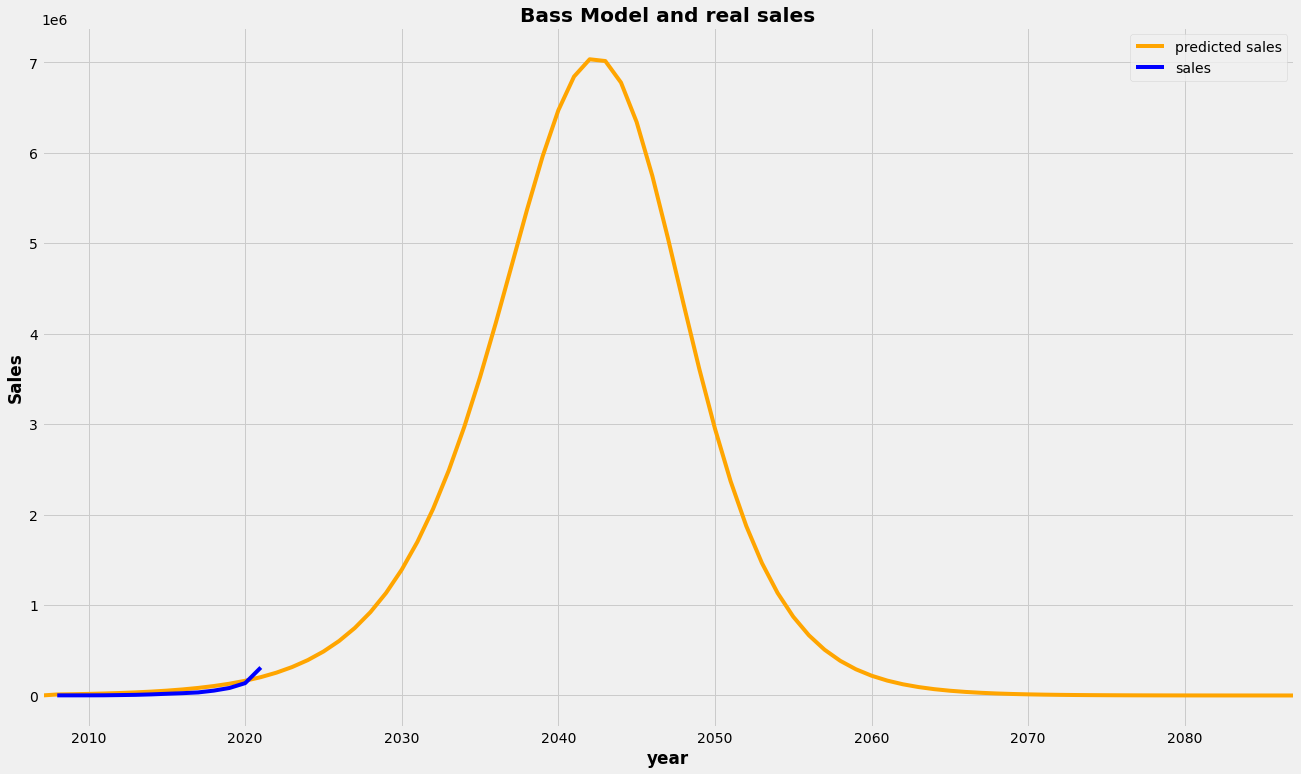

<Figure size 432x288 with 0 Axes>

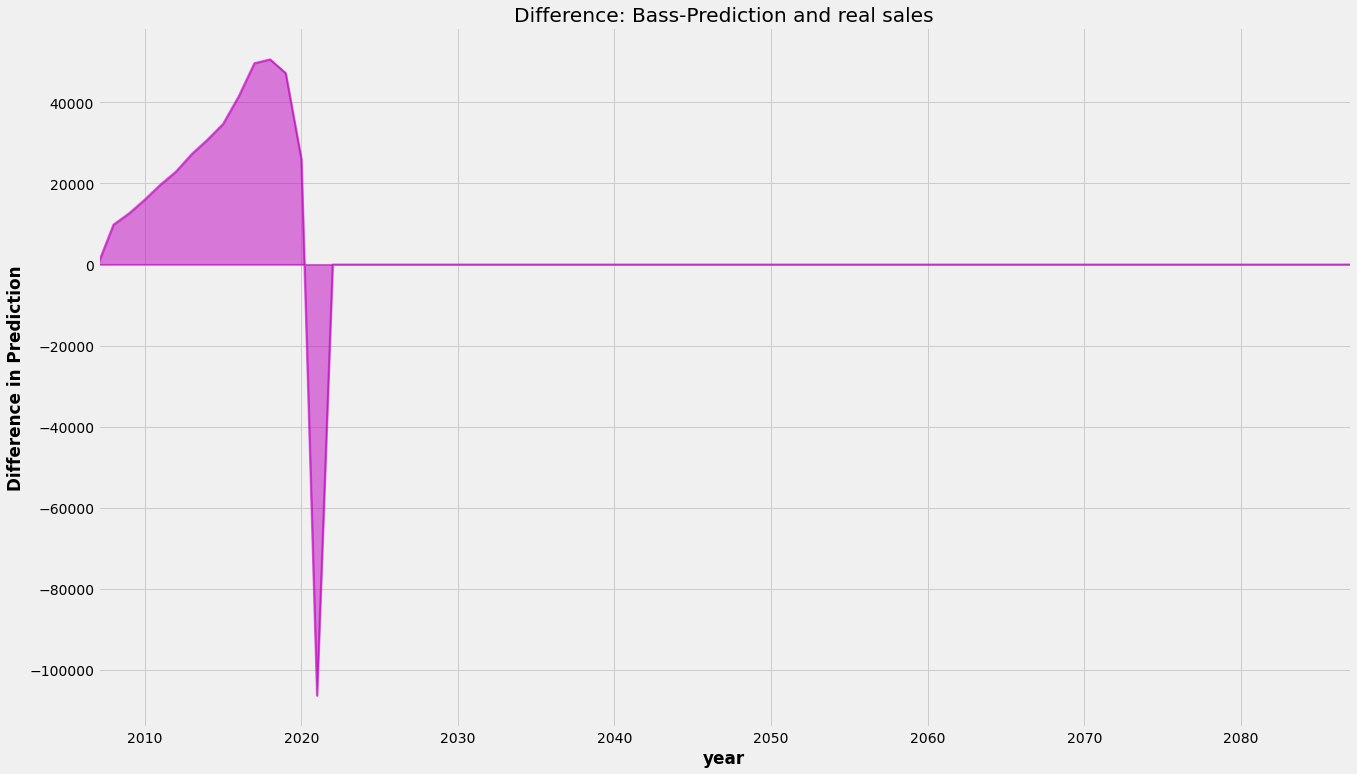

In [127]:
plt.figure(figsize = (20,12))
plt.ylabel("Sales",fontweight='bold')
plt.xlabel("year",fontweight='bold')
evehicle["predicted sales"].plot(color ="orange")
evehicle["sales"].plot(color= "blue")
plt.title("Bass Model and real sales", fontweight= 'bold')
plt.legend(fancybox = True)
plt.figure()
plt.figure(figsize = (20,12))
evehicle["diff_in_sales"] .plot(kind = "area", stacked = False, lw = 2, color = "m", linestyle = "-")
plt.title("Difference: Bass-Prediction and real sales")
plt.ylabel("Difference in Prediction",fontweight='bold')
plt.xlabel("year",fontweight='bold')


Text(0.5, 0, 'year')

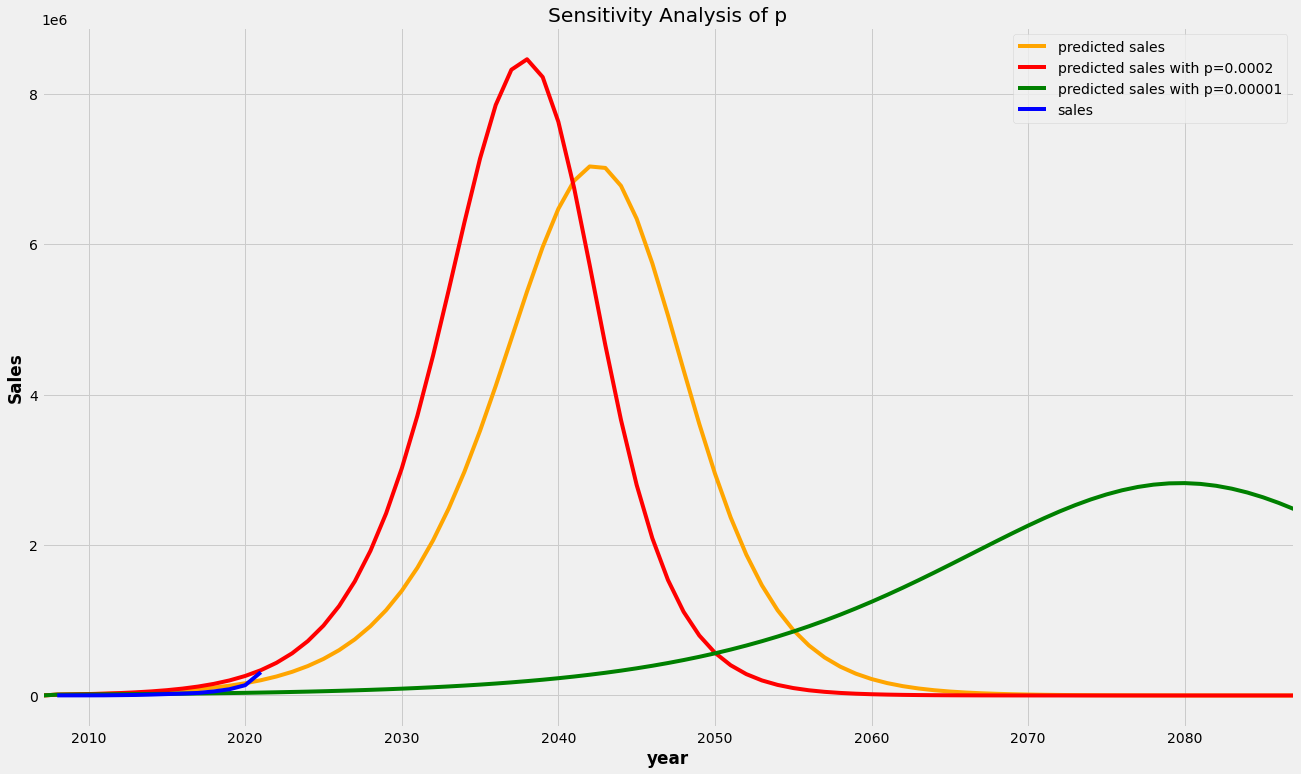

In [128]:
plt.figure(figsize = (20,12))
evehicle["predicted sales"].plot(color ="orange")
evehicle["predicted sales with p=0.0002"].plot(color= "red")
evehicle["predicted sales with p=0.00001"].plot(color= "green")
evehicle["sales"].plot(color= "blue")
plt.title("Sensitivity Analysis of p")
plt.legend()

plt.ylabel("Sales",fontweight='bold')
plt.xlabel("year",fontweight='bold')


Text(0.5, 0, 'year')

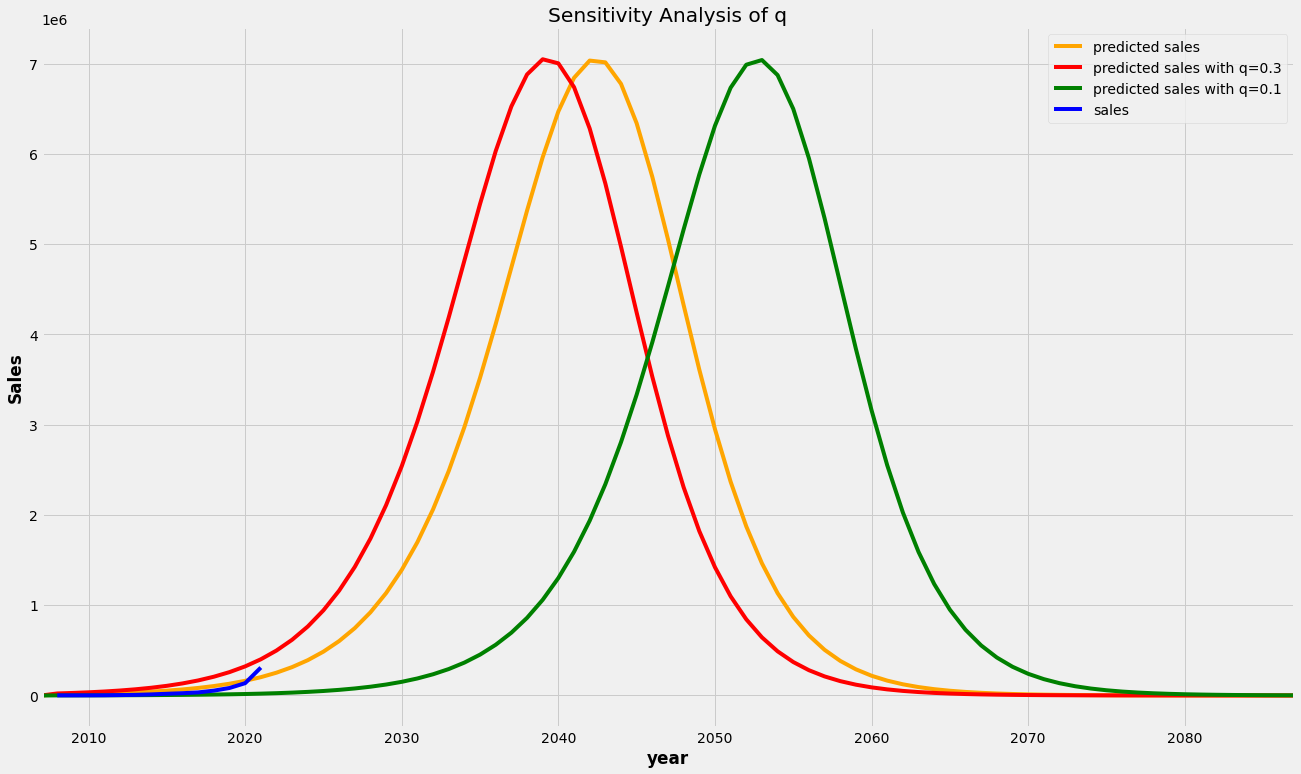

In [129]:
plt.figure(figsize = (20,12))
evehicle["predicted sales"].plot(color ="orange")
evehicle["predicted sales with q=0.3"].plot(color= "red")
evehicle["predicted sales with q=0.1"].plot(color= "green")
evehicle["sales"].plot(color= "blue")
plt.title("Sensitivity Analysis of q")
plt.legend()

plt.ylabel("Sales",fontweight='bold')
plt.xlabel("year",fontweight='bold')

In [130]:
evehicle.head()

,predicted sales,predicted sales with p=0.0002,predicted sales with p=0.00001,predicted sales with q=0.3,predicted sales with q=0.1,predicted cumulative sales,predicted cumulative sales with p=0.0002,predicted cumulative sales with p=0.00001,predicted cumulative sales with q=0.3,predicted cumulative sales with q=0.1,date,sales,cumulative sales,diff_in_sales
2007-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007-12-31,NaN,NaN,NaN
2008-12-31,11275.167600,11275.167600,11275.167600,22550.335200,1127.516760,11275.167600,11275.167600,11275.167600,22550.335200,1127.516760,2008-12-31,1436.0,1436.0,9839.167600
2009-12-31,14092.550104,14656.252108,12401.444092,28182.281416,1409.381856,25367.717704,25931.419708,23676.611692,50732.616616,2536.898616,2009-12-31,1452.0,2888.0,12640.550104
2010-12-31,17613.133399,19050.211204,13639.963925,35217.636046,1761.701775,42980.851103,44981.630912,37316.575617,85950.252662,4298.600391,2010-12-31,1588.0,4476.0,16025.133399
2011-12-31,22011.986224,24759.775162,15001.858465,44004.328412,2202.082901,64992.837327,69741.406074,52318.434082,129954.581074,6500.683292,2011-12-31,2307.0,6783.0,19704.986224


In [131]:
evehicle['percent of market potential'] =(evehicle['predicted sales']/evehicle['predicted sales'].sum())*100
evehicle['percent of market potential when p = 0.00001'] =(evehicle['predicted sales with p=0.00001']/evehicle['predicted sales with p=0.00001'].sum())*100
evehicle['percent of market potential when p = 0.0002'] =(evehicle['predicted sales with p=0.0002']/evehicle['predicted sales with p=0.0002'].sum())*100
evehicle['percent of market potential when q = 0.3'] =(evehicle['predicted sales with q=0.3']/evehicle['predicted sales with q=0.3'].sum())*100
evehicle['percent of market potential when q = 0.1'] =(evehicle['predicted sales with q=0.1']/evehicle['predicted sales with q=0.1'].sum())*100

evehicle.head()

,predicted sales,predicted sales with p=0.0002,predicted sales with p=0.00001,predicted sales with q=0.3,predicted sales with q=0.1,predicted cumulative sales,predicted cumulative sales with p=0.0002,predicted cumulative sales with p=0.00001,predicted cumulative sales with q=0.3,predicted cumulative sales with q=0.1,date,sales,cumulative sales,diff_in_sales,percent of market potential,percent of market potential when p = 0.00001,percent of market potential when p = 0.0002,percent of market potential when q = 0.3,percent of market potential when q = 0.1
2007-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007-12-31,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2008-12-31,11275.167600,11275.167600,11275.167600,22550.335200,1127.516760,11275.167600,11275.167600,11275.167600,22550.335200,1127.516760,2008-12-31,1436.0,1436.0,9839.167600,0.010000,0.014344,0.010000,0.020000,0.001000
2009-12-31,14092.550104,14656.252108,12401.444092,28182.281416,1409.381856,25367.717704,25931.419708,23676.611692,50732.616616,2536.898616,2009-12-31,1452.0,2888.0,12640.550104,0.012499,0.015777,0.012999,0.024995,0.001250
2010-12-31,17613.133399,19050.211204,13639.963925,35217.636046,1761.701775,42980.851103,44981.630912,37316.575617,85950.252662,4298.600391,2010-12-31,1588.0,4476.0,16025.133399,0.015621,0.017353,0.016896,0.031235,0.001563
2011-12-31,22011.986224,24759.775162,15001.858465,44004.328412,2202.082901,64992.837327,69741.406074,52318.434082,129954.581074,6500.683292,2011-12-31,2307.0,6783.0,19704.986224,0.019523,0.019086,0.021960,0.039028,0.001953


In [140]:
evehicle['Cumulative percent of market potential'] = evehicle['percent of market potential'].cumsum(axis=0)

evehicle.head()

,predicted sales,predicted sales with p=0.0002,predicted sales with p=0.00001,predicted sales with q=0.3,predicted sales with q=0.1,predicted cumulative sales,predicted cumulative sales with p=0.0002,predicted cumulative sales with p=0.00001,predicted cumulative sales with q=0.3,predicted cumulative sales with q=0.1,...,percent of market potential when p = 0.00001,percent of market potential when p = 0.0002,percent of market potential when q = 0.3,percent of market potential when q = 0.1,cumulative percent of market potential,p=0.00001,p=0.0002,q=0.3,q=0.1,Cumulative percent of market potential
2007-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-12-31,11275.167600,11275.167600,11275.167600,22550.335200,1127.516760,11275.167600,11275.167600,11275.167600,22550.335200,1127.516760,...,0.014344,0.010000,0.020000,0.001000,0.010000,0.014344,0.010000,0.020000,0.001000,0.010000
2009-12-31,14092.550104,14656.252108,12401.444092,28182.281416,1409.381856,25367.717704,25931.419708,23676.611692,50732.616616,2536.898616,...,0.015777,0.012999,0.024995,0.001250,0.022499,0.030122,0.022999,0.044995,0.002250,0.022499
2010-12-31,17613.133399,19050.211204,13639.963925,35217.636046,1761.701775,42980.851103,44981.630912,37316.575617,85950.252662,4298.600391,...,0.017353,0.016896,0.031235,0.001563,0.038120,0.047475,0.039894,0.076230,0.003813,0.038120
2011-12-31,22011.986224,24759.775162,15001.858465,44004.328412,2202.082901,64992.837327,69741.406074,52318.434082,129954.581074,6500.683292,...,0.019086,0.021960,0.039028,0.001953,0.057643,0.066561,0.061854,0.115257,0.005766,0.057643


Text(0.5, 0, 'Year')

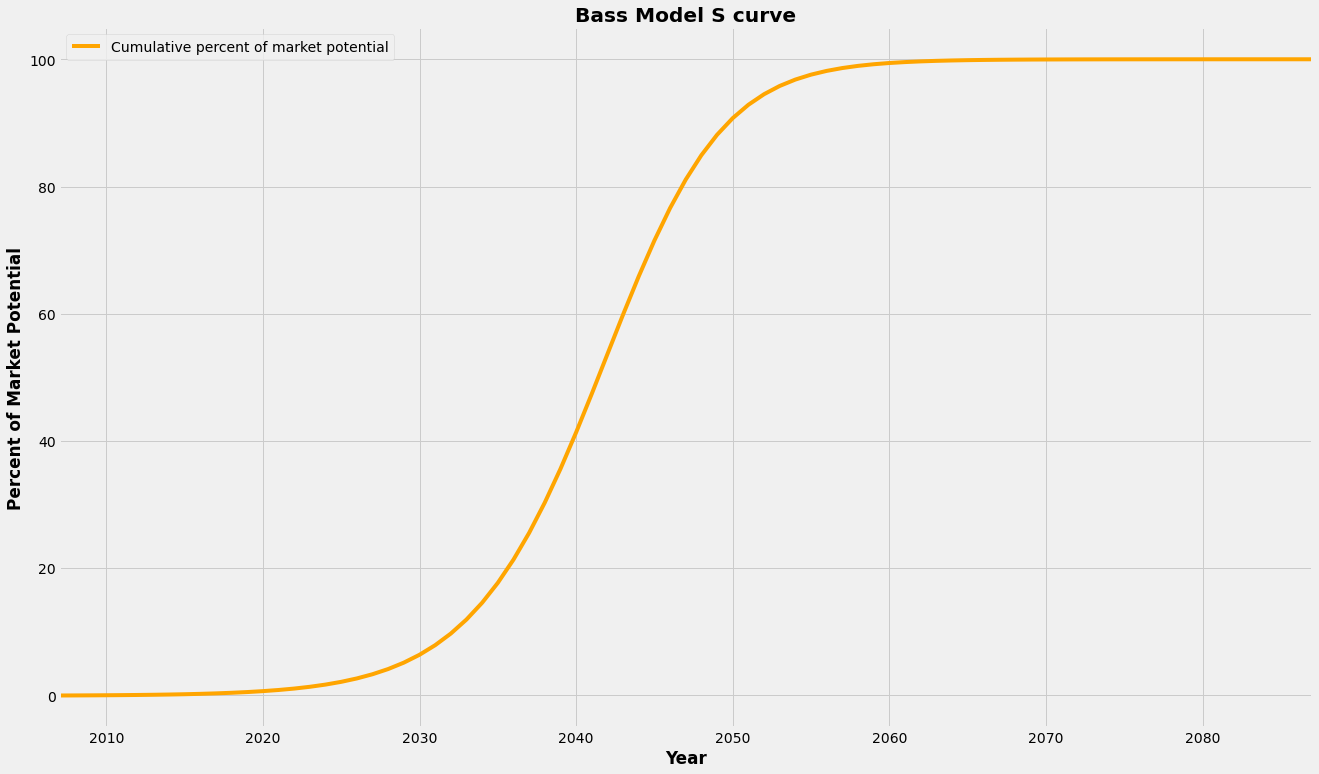

In [141]:
plt.figure(figsize = (20,12))
evehicle["Cumulative percent of market potential"].plot(color ="orange")
plt.title("Bass Model S curve",fontweight='bold')
plt.legend()
plt.ylabel("Percent of Market Potential",fontweight='bold')
plt.xlabel("Year",fontweight='bold')

In [134]:
#evehicle.groupby(['sales','predicted cumulative sales'])['predicted sales'].max()
evehicle.loc[evehicle['predicted sales'].idxmax()]

predicted sales                                          7.0341e+06
predicted sales with p=0.0002                           5.72262e+06
predicted sales with p=0.00001                               275817
predicted sales with q=0.3                              6.28183e+06
predicted sales with q=0.1                               1.9363e+06
predicted cumulative sales                              6.04977e+07
predicted cumulative sales with p=0.0002                9.41666e+07
predicted cumulative sales with p=0.00001               2.98925e+06
predicted cumulative sales with q=0.3                   8.13255e+07
predicted cumulative sales with q=0.1                   1.02974e+07
date                                            2042-12-31 00:00:00
sales                                                           NaN
cumulative sales                                                NaN
diff_in_sales                                                   NaN
percent of market potential                     

In [135]:
#evehicle.to_excel(r'C:\Users\Sajid\Desktop\home\my study\python and data science\bootcamp\Refactored_Py_DS_ML_Bootcamp-mastereveh.xlsx', sheet_name='Your sheet name', index = False)


In [136]:
evehicle['p=0.00001'] = evehicle['percent of market potential when p = 0.00001'].cumsum(axis=0)
evehicle['p=0.0002'] = evehicle['percent of market potential when p = 0.0002'].cumsum(axis=0)
evehicle['q=0.3'] = evehicle['percent of market potential when q = 0.3'].cumsum(axis=0)
evehicle['q=0.1'] = evehicle['percent of market potential when q = 0.1'].cumsum(axis=0)

Text(0.5, 0, 'Year')

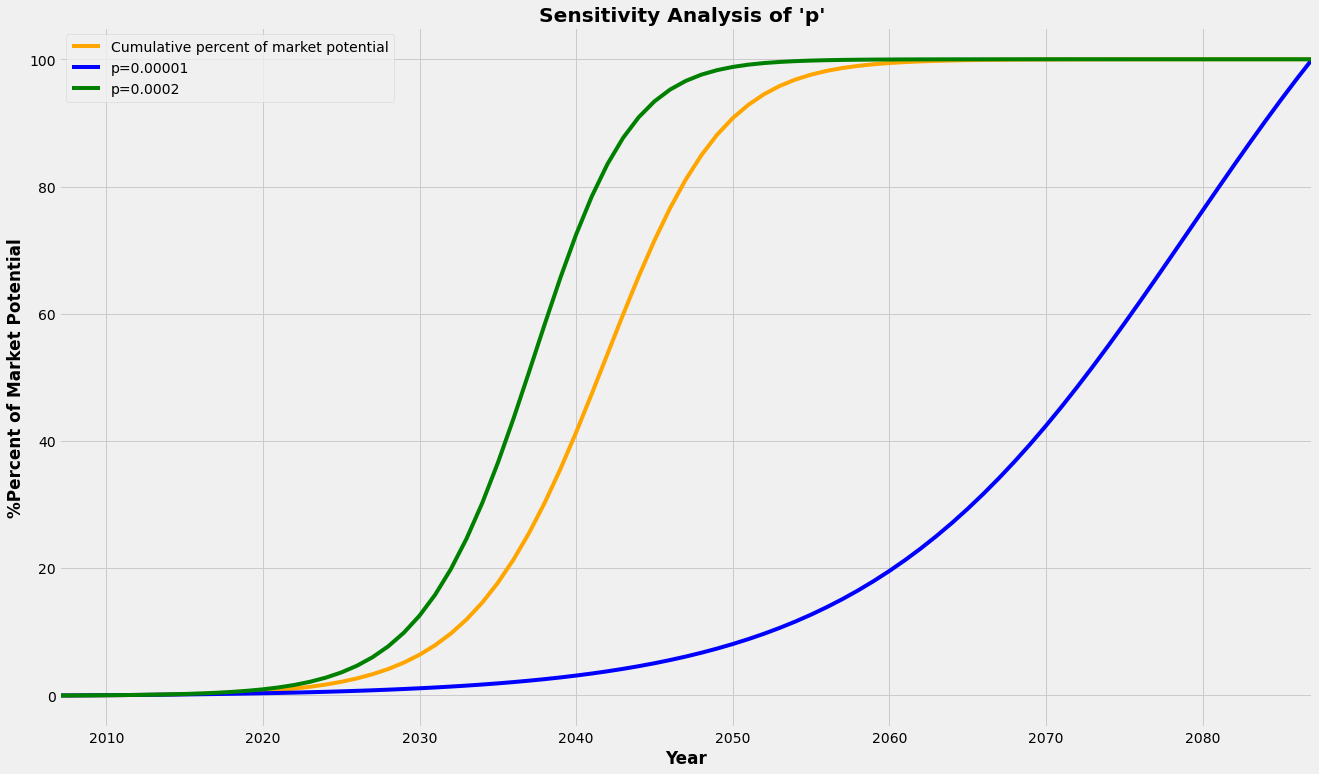

In [147]:
plt.figure(figsize = (20,12))
evehicle["Cumulative percent of market potential"].plot(color ="orange")
evehicle["p=0.00001"].plot(color ="blue")
evehicle["p=0.0002"].plot(color ="green")

plt.title("Sensitivity Analysis of 'p' ",fontweight='bold')
plt.legend()
plt.ylabel("%Percent of Market Potential",fontweight='bold')
plt.xlabel("Year",fontweight='bold')

Text(0.5, 0, 'Year')

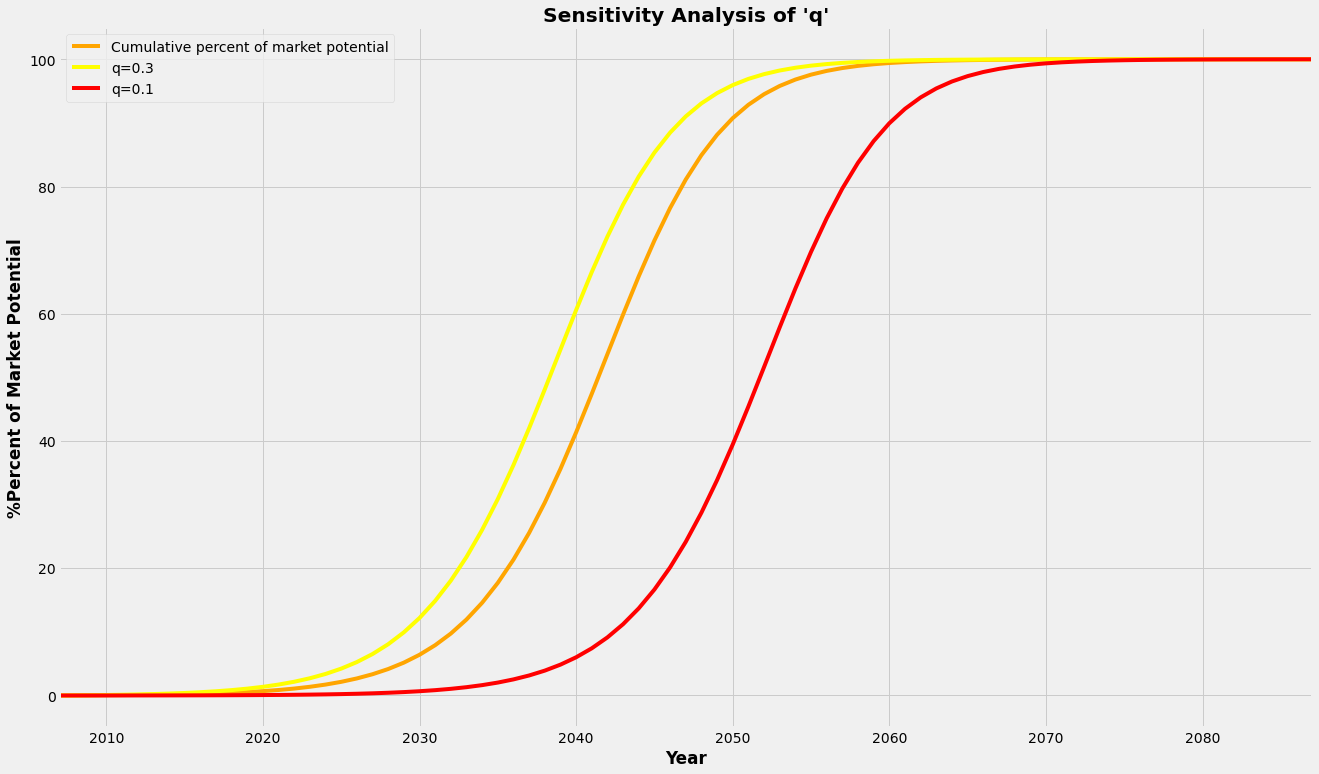

In [146]:
plt.figure(figsize = (20,12))
evehicle["Cumulative percent of market potential"].plot(color ="orange")
evehicle["q=0.3"].plot(color ="yellow")
evehicle["q=0.1"].plot(color ="red")
plt.title("Sensitivity Analysis of 'q'",fontweight='bold')
plt.legend()
plt.ylabel("%Percent of Market Potential",fontweight='bold')
plt.xlabel("Year",fontweight='bold')